<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/regresion/Programa13_Regresion_KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
# from evaluacion_funciones import * # pip install graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from pprint import pprint

In [4]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [6]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(404, 13)


In [ ]:
# 2) Extracción de características (no es necesario en este caso)

In [7]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_training = standardizer.fit_transform(X_training)

In [8]:
# # 4) Selección de atributos
sel = SelectPercentile(score_func=f_regression, percentile=90)
X_training = sel.fit_transform(X_training, y_training)
print(np.shape(X_training))

(404, 11)


In [9]:
# 5) Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='uniform', metric='euclidean')

cross_val_MAE:   2.9372 +/- 0.6702


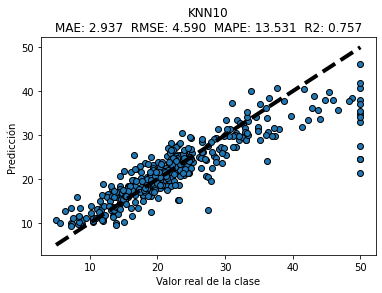

In [10]:
# 5.1) Validación cruzada interna
# Extracción de predicciones con cross_val_predict
y_pred = cross_val_predict(reg, X_training, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_val_score(reg, X_training, y_training, 
                                    cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))

# Visualización de resultados
results = evaluacion(y_training, y_pred, metricas)
grafica_real_vs_pred(y_training, y_pred, results, "KNN"+str(k))

In [11]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_training, y_training)

In [ ]:
# ---- PREDICCIÓN ---- #

In [ ]:
# 6) Extracción de las características de test

In [12]:
# 7) Estandarización de las característiacs de test
X_test = standardizer.transform(X_testing)

In [13]:
# 8) Selección de las características de test
X_test = sel.transform(X_test)

In [14]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test)

In [15]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
pprint(results)

{'MAE': 2.7751960784313723,
 'MAPE': 13.647250752896046,
 'R2': 0.7378671827901654,
 'RMSE': 4.384425980270461}


In [16]:
# Comparación con el algoritmo de regresión lineal en test
reg_OLS = linear_model.LinearRegression() # definición
model_OLS = reg_OLS.fit(X_training,y_training) # entrenamiento completo
y_pred_OLS = model_OLS.predict(X_test) # Predicción
results = evaluacion(y_testing, y_pred_OLS, metricas) # Evaluación de resultados
pprint(results)

{'MAE': 3.33569890511326,
 'MAPE': 17.740040925801143,
 'R2': 0.6211363896861358,
 'RMSE': 5.271005771775821}


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz


# Calculo de las metricas de evaluacion.
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
              (algoritmo,metricas['MAE'],metricas['RMSE'],metricas['MAPE'],metricas['R2']))
    plt.show()

# Grafica con mapa de regiones de clasificacion segun modelo ya entrenado que admita coef_ e intercept_.
def mapa_modelo_clasif_2d(X, y, modelo, metricas, algoritmo):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,16))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("%s\nACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
              (algoritmo,metricas['ACC'],metricas['PREC'],metricas['RECALL'],metricas['F1']), fontsize=28)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(modelo.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    if (hasattr(modelo, 'coef_')):
        xmin, xmax = plt.xlim()
        ymin, ymax = plt.ylim()
        coef = modelo.coef_
        intercept = modelo.intercept_

        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

            plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                     ls="--", color=color)

        for i, color in zip(modelo.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()

# Visualizacion de modelo de tipo arbol.
def mostrar_modelo_arbol(modelo, datos, nombre_archivo = "modelo"):
    dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=datos.feature_names,
                         class_names=datos.target_names, filled=True,
                         rounded=True, special_characters=True)

    graph = graphviz.Source(dot_data)
    graph.render(nombre_archivo, view=True)